# Neuhaus et al 2021 Radiocarbon Model

In [Neuhaus et al., 2021](https://tc.copernicus.org/articles/15/4655/2021/tc-15-4655-2021-supplement.pdf), the authors use molecular diffisuvity models, borehole temperature, and some measurements of borehole salt content to model the timing of retreat and readvance of the West Antarctic Ice Sheet during the early Holocene. Then, they use the windows of time that the borehole sites were open to model the radiocarbon age of the sediment using a peculiar method of constant supply of $^{12}C$ and supply of $^{14}C$ only when the area was connected to the ocean, i.e. seaward of the grounding line. 

In the cells below, we import packages and initialize the model as they derived it in order to perform sensitivity tests of the radiocarbon age. The goal is to assess radiocarbon age based on their model in comparison with measured radiocarbon ages and derived maximum age of readvance of the WAIS from [Venturelli et al., 2023](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2022AV000846). The measured age constraint was measured after this model was published, therefore it could not be used as an additional constraint. 

In [1]:
#Load packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import neuhaus_fcns as nf       #Functions to generate original plots easily. 

#Set up initial radiocarbon conditions
t_earliest = 8000       #earliest possible time the grounding line could have retreated behind field sites (same for SLM?)
n_0 = 0                 #Initial amount of 14C in the sediment, prior to Holocene retreat.
Fm_max = math.exp(-1000/8033)
                        #Fraction modern of the "modern" isopod carbon measured at the Whillans Grounding Zone
t_readvance = 4000      #Calendar years before present of ice sheet retreat poleward of SLM
ti = 4000               #Calendar years before present of ice sheet readvance seaward of SLM
a = 9.23*10**(-18)      #Accumulation rate of 14C, g/yr/100g sediment
A = 9*10**(-6)          #Accumulation rate of 12C, g/yr/100g sediment
N_0 = 0.28              #Non-zero initial condition of %TOC (g/100g sediment)
tau = 8033              #mean lifetime of 14C based off of the Libby half life.
modern_ratio = 1.176810*10**(-12)
                        #Modern ratio of 14C/12C to transform to fraction modern - from the Neuhaus et al. text. 

#Set up initial temperature model conditions
S = 34                  #PSU
ice_acc_rate = 0.15     #m/yr, Waddington et al, 2005
surf_T = -25            #temperature at the surface of the ice (Engelhardt, 2004)





dict_keys(['time_steps', 'C12', 'C14', 'fM'])


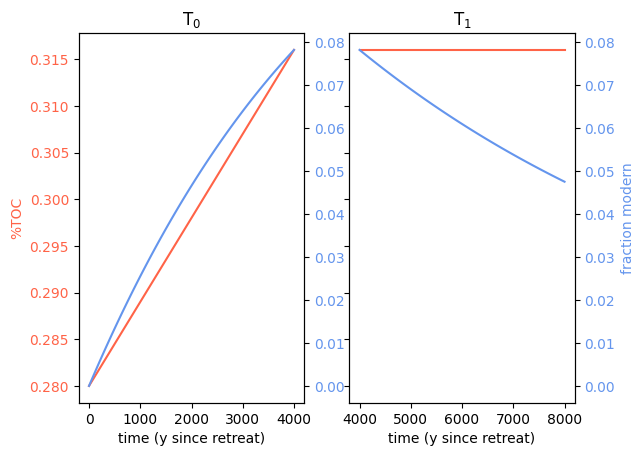

In [2]:
#Use two functions to recreate the original plot from Figure 4 in Neuhaus et al., 2021
nf.DEBUG = False
retreat_out_dict, readvance_out_dict = nf.model_coupler(t_earliest, t_readvance, a, A)

nf.fig_4_emulator(retreat_out_dict, readvance_out_dict)

print(retreat_out_dict.keys())

#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Papers/In Progress/Rosenheim et al, 2024 Neuhaus_Lowry Models/Neuhaus_Fig_4_Repro.png', dpi=600)


# Sensitivity Tests

Having reconstructed the plots in Neuhaus et al., 2021, now we change variables to conduct sensitivity tests. In the original work, the minimum age of radiocarbon in sediments under the WAIS would have been 20,470 $^{14}C$ years. However, the authors claim to use this to estimate the most recent readvance as having occurred at 1000 years before present and the original Holocene retreat being at most 4,800 years before present. These ages are all much younger than the 6,200 years before present in Venturelli et al., 2023. 

## 1. Length of open water exposure
The first sensitivity test is to measure the sensitivity of the radiocarbon downcore trend to the lenght of time that the site is in contact with ocean water and radiocarbon. We can generate a list of readvance times while holding the retreat time constant to vary this window of time. Keeping all other values constant, we can see how this affects the %TOC and radiocarbon values. 

In [3]:
nf.DEBUG = False
t_earliest = 8000
t_readvance = np.linspace(7500, 1000, 5)

ex_time_dict = {}

for t in t_readvance:
   retreat_out_dict, readvance_out_dict = nf.model_coupler(t_earliest, t, a, A) 
   out_dict = {'retreat':retreat_out_dict, 'readvance':readvance_out_dict}
   ex_time_dict |= {str(t_earliest-t):out_dict}

print(ex_time_dict.keys())

dict_keys(['500.0', '2125.0', '3750.0', '5375.0', '7000.0'])


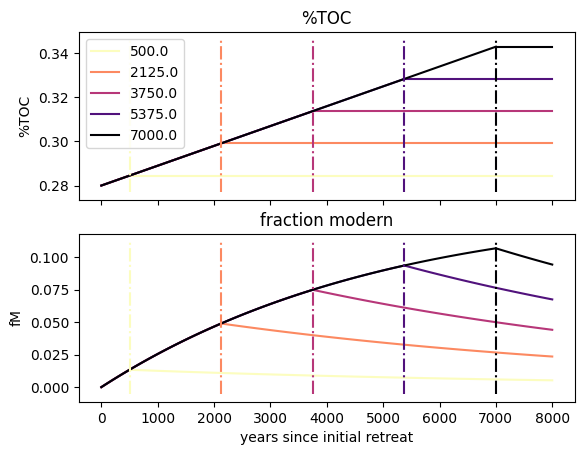

In [4]:
time_axes = nf.sensitivity_test_plotter(ex_time_dict, t_readvance, colormap='magma')
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Papers/In Progress/Rosenheim et al, 2024 Neuhaus_Lowry Models/Neuhaus_Time_of_Exposure_Sensitivity.png', dpi=600)

In [5]:
#What is the age of the maximum fM in this model? What is the maximum age of the minimum curve?

print('Minimum age of 5000 y exposure time: ', -8033*math.log(max(ex_time_dict['7000.0']['retreat']['fM'])))
print('Minimum age of 500 y exposure time: ', -8033*math.log(max(ex_time_dict['500.0']['retreat']['fM'])))

Minimum age of 5000 y exposure time:  17965.239925522754
Minimum age of 500 y exposure time:  34663.91304509373


## 2. Accumulation rate of $^{12}C$

In the paper, Neuhaus et al. 2021 investigate using a constant or a constantly growing (1%) per year rate of A. Here, 
we investigage what happens simply by changing A. Does this change the magnitue or the timing of the radiocarbon peak?

In [6]:
nf.DEBUG = False

#Reset the t_earliest and t_readvance to constants:
t_earliest = 8000
t_readvance = 4000

#Create a length 5 list of A values:
A = np.linspace(0.000003, 0.000015, 5)
print(A)
A_dict = {}

for AccRate in A:
   print(AccRate)
   retreat_out_dict, readvance_out_dict = nf.model_coupler(t_earliest, t_readvance, a, AccRate) 
   out_dict = {'retreat':retreat_out_dict, 'readvance':readvance_out_dict}
   A_dict |= {str(AccRate):out_dict}

print(A_dict.keys())


[3.0e-06 6.0e-06 9.0e-06 1.2e-05 1.5e-05]
3e-06
6e-06
9e-06
1.2e-05
1.5e-05
dict_keys(['3e-06', '6e-06', '9e-06', '1.2e-05', '1.5e-05'])


Minimum age at inflection =  19837.258713967763  for  3e-06  treatment.
Minimum age at inflection =  20160.778945742833  for  6e-06  treatment.
Minimum age at inflection =  20471.77262209032  for  9e-06  treatment.
Minimum age at inflection =  20771.173736496483  for  1.2e-05  treatment.
Minimum age at inflection =  21059.815566609446  for  1.5e-05  treatment.


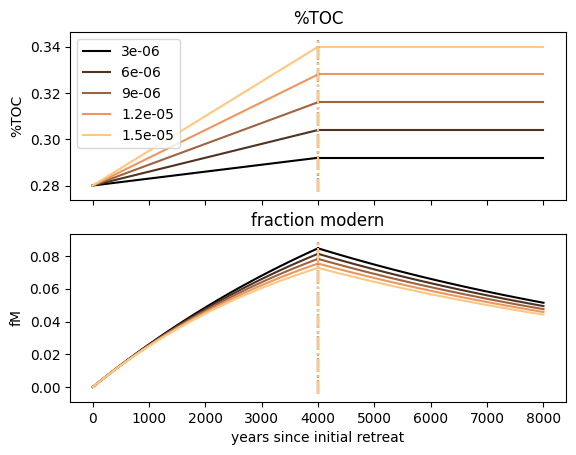

In [7]:
A_axes = nf.sensitivity_test_plotter(A_dict, A)
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Papers/In Progress/Rosenheim et al, 2024 Neuhaus_Lowry Models/Neuhaus_12C_Accumulation_Sensitivity.png', dpi=600)
for k, v in A_dict.items():
    print('Minimum age at inflection = ', -8033*math.log(v['retreat']['fM'][-1]), ' for ', k, ' treatment.')

## 3. Variable accumulation rate of $^{12}C$

Neuhaus et al., 2021 explore the effects of a variable A. They use one non-constant A level which allows A to grow by 1% every 100 y. Below, we try a few changing A scenarios. 

[Text(0, 0.5, 'A, g/yr/100g sediment'),
 Text(0.5, 0, 'y after initial retreat')]

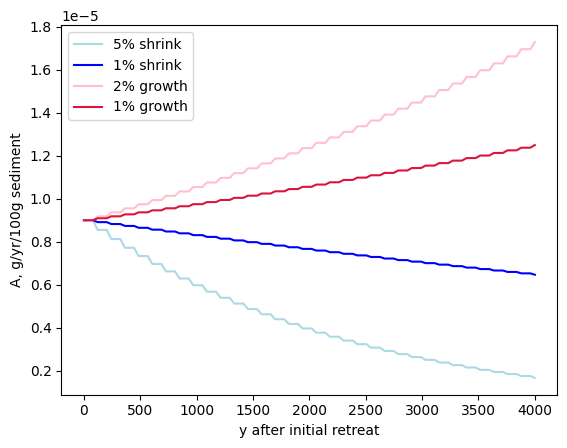

In [8]:
#Set A back to a constant:

A = 9*10**(-6)          #Accumulation rate of 12C, g/yr/100g sediment
A_growth1, A_growth2, A_shrink1, A_shrink5 = np.linspace(A, A, 100), np.linspace(A, A, 100), np.linspace(A, A, 100), np.linspace(A, A, 100)

steps = np.linspace(t_earliest-t_earliest, t_earliest-t_readvance, 100)

#Add 1% to A every 100 years
pin = steps[0]
for ind, acc in enumerate(A_growth1):
    if ind == 0:
        #print('First loop...')
        A_growth1[ind] = acc
    else:
        if steps[ind]-pin > 100:
            #print('ind = ', ind, 'adding 1% to previous value of ', A_growth1[ind-1])
            A_growth1[ind] = 1.01*A_growth1[ind-1]
            pin = steps[ind]
        else:
            A_growth1[ind] = A_growth1[ind-1]
A_growth1 = A_growth1.tolist()

#Add 2% ever 100 years:
pin = steps[0]
for ind, acc in enumerate(A_growth2):
    if ind == 0:
        #print('First loop...')
        A_growth2[ind] = acc
    else:
        if steps[ind]-pin > 100:
            #print('ind = ', ind, 'adding 5% to previous value of ', A_growth5[ind-1])
            A_growth2[ind] = 1.02*A_growth2[ind-1]
            pin = steps[ind]
        else:
            A_growth2[ind] = A_growth2[ind-1]
A_growth2 = A_growth2.tolist()
#print('Growth - 2%', type(A_growth2), len(A_growth2))

#Subtract 1% per century:
pin = steps[0]
for ind, acc in enumerate(A_shrink1):
    if ind == 0:
        #print('First loop...')
        A_shrink1[ind] = acc
    else:
        if steps[ind]-pin > 100:
            #print('ind = ', ind, 'subtracting 1% from previous value of ', A_shrink1[ind-1])
            A_shrink1[ind] = 0.99*A_shrink1[ind-1]
            pin = steps[ind]
        else:
            A_shrink1[ind] = A_shrink1[ind-1]
A_shrink1 = A_shrink1.tolist()
#print('Shrink - 1%', A_shrink1)

#Subtract 5% every 100 years:
pin = steps[0]
for ind, acc in enumerate(A_shrink5):
    if ind == 0:
        #print('First loop...')
        A_shrink5[ind] = acc
    else:
        if steps[ind]-pin > 100:
            #print('ind = ', ind, 'subtractng 5% from previous value of ', A_shrink5[ind-1])
            A_shrink5[ind] = 0.95*A_shrink5[ind-1]
            pin = steps[ind]
        else:
            A_shrink5[ind] = A_shrink5[ind-1]
A_shrink5 = A_shrink5.tolist()

#print('Shrink - 5%', A_shrink5)


fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(steps, A_shrink5, color='lightblue', label='5% shrink')
ax.plot(steps, A_shrink1, color='blue', label='1% shrink')
ax.plot(steps, A_growth2, color='pink', label='2% growth')
ax.plot(steps, A_growth1, color='crimson', label='1% growth')
ax.legend()
ax.set(ylabel='A, g/yr/100g sediment', xlabel='y after initial retreat' )



In [9]:
nf.DEBUG = False

#Reset a:
a = 9.23*10**(-18)      #Accumulation rate of 14C, g/yr/100g sediment

#Make a dictionary of different A's from above. 
var_A_dict = {
   "1% growth":A_growth1, 
   "2% growth":A_growth2,
   "1% shrink":A_shrink1,
   '5% shrink':A_shrink5
}

var_A_out_dict = {}

for k, v in var_A_dict.items():
   print(k)
   retreat_out_dict, readvance_out_dict = nf.model_coupler(t_earliest, t_readvance, a, v) 
   out_dict = {'retreat':retreat_out_dict, 'readvance':readvance_out_dict}
   var_A_out_dict |= {k:out_dict}

print(var_A_out_dict.keys())


1% growth
2% growth
1% shrink
5% shrink
dict_keys(['1% growth', '2% growth', '1% shrink', '5% shrink'])


Minimum age of 2% growth line:  21274.29789504762
Minimum age of 5% shrink line:  19688.0112319881


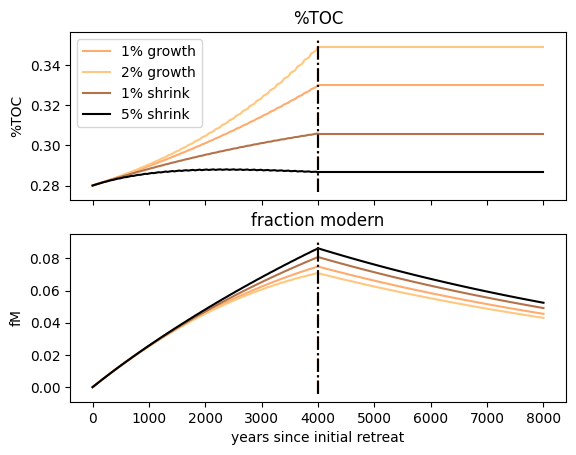

In [10]:
var_A_axes = nf.sensitivity_test_plotter(var_A_out_dict, [1, 2, -1, -5])
print('Minimum age of 2% growth line: ', -8033*math.log(var_A_out_dict['2% growth']['retreat']['fM'][-1]))
print('Minimum age of 5% shrink line: ', -8033*math.log(var_A_out_dict['5% shrink']['retreat']['fM'][-1]))
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Papers/In Progress/Rosenheim et al, 2024 Neuhaus_Lowry Models/Neuhaus_Variable_12C_Accumulation_Sensitivity.png', dpi=600)

## 4. Accumulation rate of $^{14}C$

Here we vary the supply of $^{14}$ in the organic carbon. This is implicit radiocarbon reservoir age, which in Neuhaus et al., 2021 is based on dated isopods from the Whillans grounding line. 

In [11]:
#Relate accumulation rate of 14C to reservoir age:

reservoir_ages = np.linspace(200, 4000, 5)
print(type(reservoir_ages))
a = nf.convert_reservoir_to_raw_n(reservoir_ages)
print(a)





<class 'numpy.ndarray'>
Not a list - Variable R is a  <class 'numpy.ndarray'> converting to a list.
Variable is an  <class 'numpy.ndarray'> . Changing to list.
0 200.0
1 1150.0
2 2100.0
3 3050.0
4 4000.0
[1.0330851056107167e-17, 9.1785799032242e-18, 8.154829508462252e-18, 7.2452650642314e-18, 6.437150623014156e-18]


In [12]:
nf.DEBUG = False

#Reset A to a constant:
A = 9*10**(-6)          #Accumulation rate of 12C, g/yr/100g sediment

#Create a length 5 list of A values:
#a = np.linspace(5e-18, 20e-18, 5)
#for ind, num in enumerate(a):
#   rounded_num = nf.precision_round(num, digits=3)
#   a[ind] = rounded_num
#print(a)
a_dict = {}
print('R:', reservoir_ages)

for ind, aR in enumerate(a):
   print(aR)
   retreat_out_dict, readvance_out_dict = nf.model_coupler(t_earliest, 6500, aR, A) 
   out_dict = {'retreat':retreat_out_dict, 'readvance':readvance_out_dict}
   a_dict |= {reservoir_ages[ind]:out_dict}

print(a_dict.keys())



R: [ 200. 1150. 2100. 3050. 4000.]
1.0330851056107167e-17
9.1785799032242e-18
8.154829508462252e-18
7.2452650642314e-18
6.437150623014156e-18
dict_keys([np.float64(200.0), np.float64(1150.0), np.float64(2100.0), np.float64(3050.0), np.float64(4000.0)])


Minimum age of 2% growth line:  25870.419310510926
Minimum age of 5% shrink line:  29670.419310510926
Difference =  3800.0


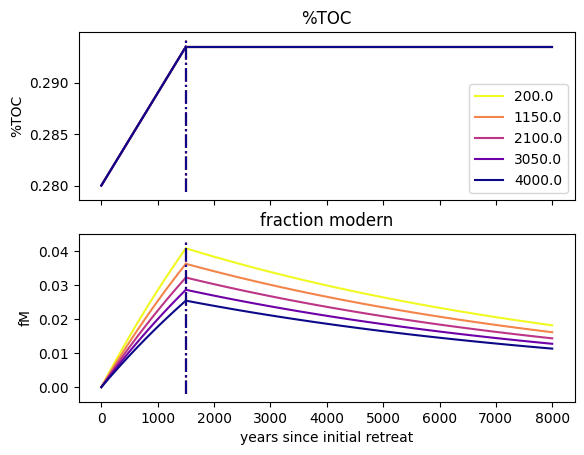

In [13]:
a_axes = nf.sensitivity_test_plotter(a_dict, a, colormap='plasma')
age_max = -8033*math.log(a_dict[4000.0]['readvance']['fM'][3])
age_min = -8033*math.log(a_dict[200.0]['readvance']['fM'][3])
print('Minimum age of 2% growth line: ', age_min)
print('Minimum age of 5% shrink line: ', age_max)
print('Difference = ', age_max-age_min)
#plt.savefig('C:/Users/beros/Box/UDrive_brosenheim/My_Documents/Research/Papers/In Progress/Rosenheim et al, 2024 Neuhaus_Lowry Models/Neuhaus_Reservoir_Age_Sensitivity.png', dpi=600)

## Temperature Model

The following cells aim to model the temperature profile through the ice, first using all boundary conditions and assumptions of Neuhaus et al., and then changing to those likely or measured for SLM. 

### Phase 1:

In [14]:
#Phase 1 temperature model:

#Linear Temperature Gradient:
ice_thickness = np.linspace(500, 1000, 5)

#Depth profiles:
profiles_dict = {}
for j, thick in enumerate(ice_thickness):
    base_temp = 0.081 - 0.0568*S - 6.858e-4*thick
    depths = np.linspace(0, thick, 100)
    profile = np.linspace(base_temp, -25, 100)
    df = pd.DataFrame({'depth':depths, 'temperature':profile})
    profiles_dict |= {str(round(thick, 0)):df}

print(profiles_dict.keys())

#Plot profiles



dict_keys(['500.0', '625.0', '750.0', '875.0', '1000.0'])
